In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Confidence Intervals: Method ##

A *confidence interval* is an interval of estimates of a fixed but unknown parameter, based on data in a random sample. In this section we will construct confidence intervals for an unknown population mean, based on a large i.i.d. sample drawn from the population. 

Proportions are means of zeros and ones. So, as a special case of our method, we will also be able to construct confidence intervals for unknown population proportions.

First let's recall from Data 8 why we use intervals to estimate an unknown number, instead of just providing one number as the estimate. Suppose that you are trying to estimate an unknown parameter $\mu$, and suppose that based on your random sample you think $\mu$ is 4. Why not just say that your estimate is 4, and be done with it?

It is because your estimate 4 is based on observations in a random sample, and you know that *the sample could have come out differently*. If the sample had come out differently, you might have come up with an estimate that was different from 4. Just saying that the estimate is 4 doesn't take that into account.

You have to give yourself some wiggle room to allow for the fact that different random samples would have led to different estimates of the parameter. So you should provide an interval of estimates instead of just one number.

### Confidence Interval for a Population Mean ###

Let $X_1, X_2, \ldots, X_n$ be i.i.d. with mean $\mu$. We will call $\mu$ the "underlying mean" or the "population mean". 

Data scientists often don't know the value of $\mu$ and would like to estimate it. For example, if each $X_i$ is the annual income of a randomly picked U.S. household then $\mu$ is the average annual income in all U.S. households, which the data scientists might not know. It could also be that the model is more abstract and $\mu$ is an abstract quantity whose exact value is unknowable. For example, if each $X_i$ is a measurement of length and the object being measured has length $\mu$, we will never be able to know the value of $\mu$ with infinite precision. All measuring processes, no matter how sophisticated, have some error.

We do know, however, that the sample mean $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$ is an unbiased estimate of $\mu$. We also know that $SD(\bar{X}) = \frac{\sigma}{\sqrt{n}}$ where $\sigma = SD(X_i)$ for every $i$.

If $n$ is large, the Central Limit Theorem tells us that the distribution of $\bar{X}$ is roughly normal. Therefore, for large $n$,

$$
P\left(\mu - 2\frac{\sigma}{\sqrt{n}} < \bar{X} < \mu + 2\frac{\sigma}{\sqrt{n}}\right) ~ \approx ~ 0.95
$$

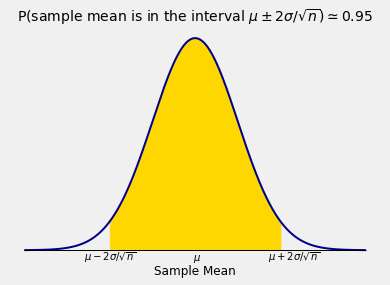

In [2]:
# NO CODE

x = np.arange(-4, 4.01, 0.01)
phi = stats.norm.pdf(x)
plt.plot(x, phi, color='darkblue', lw=2)
t = np.arange(-2, 2.01, 0.01)
phi2 = stats.norm.pdf(t)
plt.fill_between(t, phi2, color='gold')
plt.xticks([])
plt.yticks([])
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.xlabel('Sample Mean', fontsize=12)
plt.text(-0.05, -0.02, '$\mu$', fontsize=10)
plt.text(1.7, -0.02, '$\mu+2\sigma/\sqrt{n}$', fontsize=10)
plt.text(-2.6, -0.02, '$\mu-2\sigma/\sqrt{n}$', fontsize=10)
plt.title('P(sample mean is in the interval $\mu \pm 2\sigma/\sqrt{n}$)$\simeq 0.95$', fontsize=14);

We can rewrite this to get an interval of estimates of $\mu$.

$$
\begin{align*}
&P\left(\mu - 2\frac{\sigma}{\sqrt{n}} < \bar{X} < \mu + 2\frac{\sigma}{\sqrt{n}}\right) ~ \approx ~ 0.95 \\
\iff ~ &P\left(\bar{X} - 2\frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + 2\frac{\sigma}{\sqrt{n}}\right) ~ \approx ~ 0.95 \\
\iff ~ &P\left(\mu \in (\bar{X} - 2\frac{\sigma}{\sqrt{n}}, ~ \bar{X} + 2\frac{\sigma}{\sqrt{n}})\right) ~ \approx ~ 0.95
\end{align*}
$$

The random interval

$$
\left(\bar{X} - 2\frac{\sigma}{\sqrt{n}}, ~ \bar{X} + 2\frac{\sigma}{\sqrt{n}}\right)
$$

is called an *approximate 95% confidence interval for $\mu$*. It is a random interval because its endpoints depend on the sample mean $\bar{X}$ which is a random variable whose value varies across samples.

Our calculation showed that the chance that this *random interval* contains the *fixed parameter* is about 95%.

In practice, we only get one observed instance of the random interval. 

### Mean Commute Distance ###
In a simple random sample of 600 workers taken in a large city, the commute distances of the sampled workers have an average of 19 miles and an SD of 13 miles.

We can use these data to construct an approximate 95% confidence interval for the average commute distance of all workers in the city.

First note that while a sample of size 600 is large in absolute terms, it is pretty small in comparison to the total number of workers in the city. So we can think of the sample as essentially drawn with replacement and hence i.i.d. 

Now our method says that our observed approximate 95% confidence interval for the population mean commute distance $\mu$ is given by

$$
19 ~ \pm ~ 2\frac{\sigma}{\sqrt{600}}
$$

where $\sigma$ is the SD of the commute distances in the population. We don't know $\sigma$, but by an argument that we have seen before,

$$
\frac{\sigma}{\sqrt{600}} ~ \approx ~ \frac{\text{sample SD}}{\sqrt{600}} ~ = ~ \frac{13}{\sqrt{600}} ~ \approx ~ 0.53
$$

So an approximate 95% confidence interval for the average commute distance (in miles) of workers in the city is given by

$$
19 \pm 2 \times 0.53 ~ = ~ (17.94, 20.06)
$$

### Proportion of Undecided Voters ###

In a simple random sample of 400 voters in a state, 23% are undecided about which way they will vote.

We can use these data to construct an approximate 95% confidence interval for the proportion of undecided voters in the state, following the process we developed above. 

Remember that the population proportion of undecided voters, which we will denote by $p$, is the mean of the zeros and ones in the population. Here undecided voters are coded as 1 and all others as 0. So also that sample proportion of undecided voters, 0.23, is the observed sample mean.

Our observed approximate 95% confidence interval for the proportion of undecided voters in the state is given by

$$
0.23 \pm 2 \frac{\sigma}{\sqrt{400}}
$$

where $\sigma$ is the SD of the zeros and ones in the population. We know that $\sigma = \sqrt{pq}$ where $q = 1-p$, so

$$
\frac{\sigma}{\sqrt{400}} ~ = ~ \frac{\sqrt{pq}}{\sqrt{400}} ~ \approx ~ \frac{\sqrt{0.23 \times 0.77}}{\sqrt{400}} ~ \approx ~ 0.021
$$

So an an approximate 95% confidence interval for the proportion of undecided voters in the population is

$$
0.23 \pm 2 \times 0.021 ~ = (0.188, 0.272)
$$

In other words, our 95% confidence interval for the percent of undecided voters in the population goes from 18.8% to 27.2%.

### Confidence Level ###

The confidence intervals in this section all have the form

$$
\text{sample mean} ~ \pm ~ zSD(\text{sample mean})
$$

We took $z = 2$ because the *confidence level* of the each of the intervals was 95% and we know that the area under the standard normal curve between $-2$ and $2$ is about 95%.

If we had wanted a different level of confidence, say 99%, we would only have had to change the value of $z$.

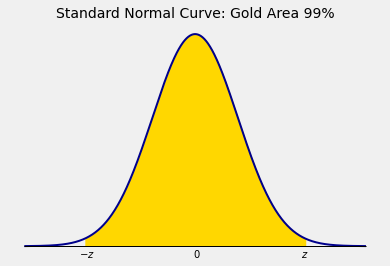

In [3]:
# NO CODE

x = np.arange(-4, 4.01, 0.01)
phi = stats.norm.pdf(x)
plt.plot(x, phi, color='darkblue', lw=2)
z_99 = stats.norm.ppf(.995)
t = np.arange(-z_99, z_99+.01, 0.01)
phi2 = stats.norm.pdf(t)
plt.fill_between(t, phi2, color='gold')
plt.xticks([])
plt.yticks([])
plt.plot([-4, 4], [0, 0], color='k', lw=1)
plt.text(-0.05, -0.02, '0', fontsize=10)
plt.text(z_99-0.1, -0.02, '$z$', fontsize=10)
plt.text(-z_99-0.15, -0.02, '$-z$', fontsize=10)
plt.title('Standard Normal Curve: Gold Area 99%', fontsize=14);

The area of each tail in the diagram above is $0.005$, so $\Phi(z) = 0.995$. The value of $z$ is therefore

$$
z ~ = ~ \Phi^{-1}(0.995) ~ \approx ~ 2.576
$$

You can get the numerical value by using `stats.norm.ppf`:

In [4]:
stats.norm.ppf(0.995)

2.5758293035489004

Thus an approximate 99% confidence interval for the mean commute distance of all workers in the city in the first example is

$$
19 \pm 2.576 \times 0.53 ~ = ~ (17.63, 20.36)
$$

The 99% confidence interval is wider than the 95% confidence interval $(17.94, 20.06)$. 

We asked for 99% confidence instead of 95%. For this increased confidence based on the same sample as before, we had to give the estimate more wiggle room.